# Notebook Testing Author's X2 DWSR Model Weights

In [27]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from model import get_model, get_loss, get_optimizer
from image_to_train import bands_to_image, display_image, unpack_numpy_subimages, preprocess_single_train
from tensorflow.python.training import py_checkpoint_reader
import test_func as test
import image_to_train as tr

In [28]:
# load author's DWSR weights
x2_weight_path = os.path.join('saved_weights', 'Weightx2', 'x2.ckpt')
model = get_model()
x2_model = test.load_x2_from_weights(model, x2_weight_path)

In [29]:
def read_and_decode(path):
    im = tf.io.read_file(path)
    im = tf.image.decode_image(im, channels=3)
    im = tf.image.convert_image_dtype(im, tf.float32)
    return im

# edit these paths to try different images
y_path = os.path.join('Urban 100', 'X2 Urban100', 'X2', 'HIGH X2 Urban', 'img_001_SRF_2_HR.png')
x_path = os.path.join('Urban 100', 'X2 Urban100', 'X2', 'LOW X2 Urban', 'img_001_SRF_2_LR.png')
init_test_x = read_and_decode(x_path)
init_test_y = read_and_decode(y_path)

init_test_x = tr.preprocess_single_image(init_test_x)
init_test_y = tr.to_luminance(init_test_y)

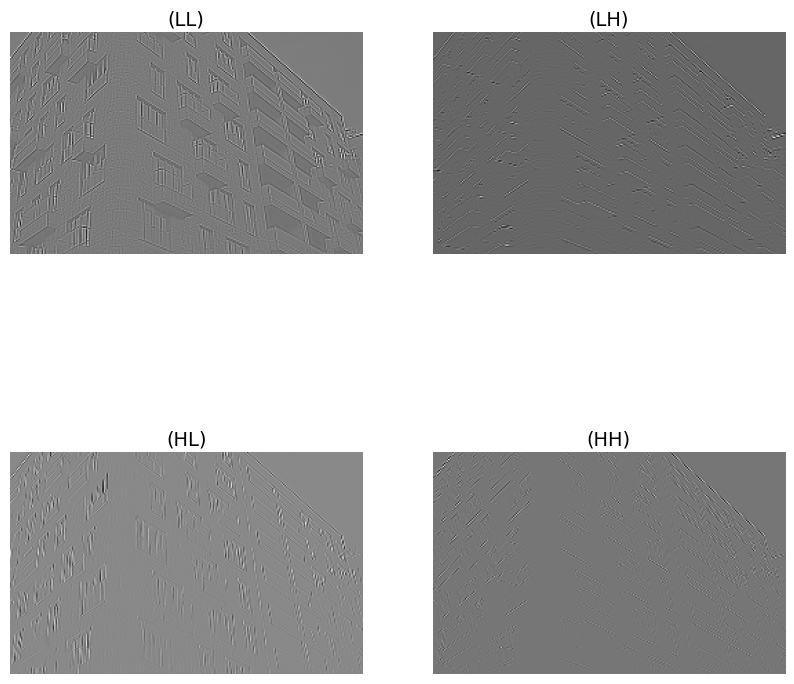

In [31]:
test_x = tf.transpose(init_test_x, [0, 2, 3, 1])
test_out = x2_model(test_x)
test_out = tf.squeeze(test_out)
test_out = np.moveaxis(test_out, -1, 0)
display_image(test_out, (10, 10))

In [36]:
init_test_x = tf.squeeze(init_test_x)
lowres = bands_to_image(init_test_x)
SR = bands_to_image(init_test_x+test_out)
highres = tf.squeeze(init_test_y)

In [38]:
# checking PSNR
print('PSNR lr: ',tf.image.psnr(lowres[..., tf.newaxis], highres[..., tf.newaxis], max_val=1.0).numpy())
print('PSNR sr: ', tf.image.psnr(SR[..., tf.newaxis], highres[..., tf.newaxis], max_val=1.0).numpy())

# checking SSIM
print('ssim lr:', tf.image.ssim(lowres[..., tf.newaxis], highres[..., tf.newaxis], max_val=1.0).numpy())
print('ssim sr:', tf.image.ssim(SR[..., tf.newaxis], highres[..., tf.newaxis], max_val=1.0).numpy())

PSNR lr:  27.760405
PSNR sr:  31.63153
ssim lr: 0.86735517
ssim sr: 0.91683805


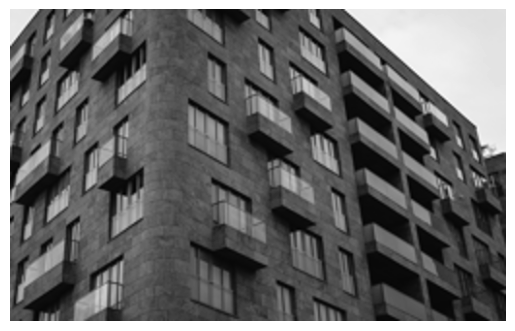

In [39]:
# low resolution image
tr.display_image(lowres)

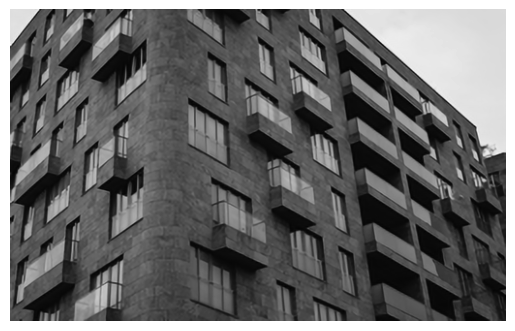

In [40]:
# super-resolution image
tr.display_image(SR)

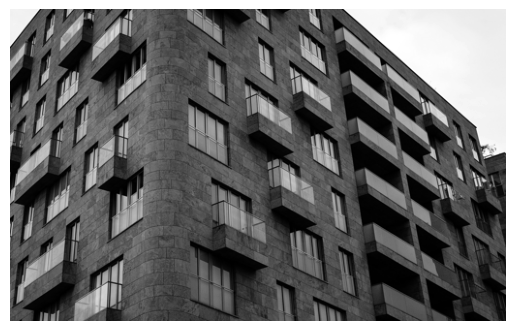

In [41]:
# true high-resolution
tr.display_image(init_test_y)